# AutoEncoders and its Applications in Deep Learning Problems

* a simple autoencoder based on a fully-connected layer
* a sparse autoencoder
* a deep fully-connected autoencoder
* a deep convolutional autoencoder
* an image denoising model
* a sequence-to-sequence autoencoder
* a variational autoencoder





In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

# Dataset Preparation

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,_),(x_test,_) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


# Simplest Possible Encoder

In [ ]:
def Simple_Encoder(encoding_dim):
  # Encoding Dim : The dimension of the encoded image 
  input_img = tf.keras.Input(shape=(784,))
  encoded = tf.keras.layers.Dense(encoding_dim,activation="relu")(input_img)
  decoded = tf.keras.layers.Dense(784,activation="sigmoid")(encoded)
  model = tf.keras.Model(inputs = input_img, outputs = decoded)
  model.build(input_shape=(784))
  return model

In [ ]:
model = Simple_Encoder(32)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy')
model.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 [==============================] - 4s 4ms/step - loss: 0.3802 - val_loss: 0.1917
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1819 - val_loss: 0.1532
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1484 - val_loss: 0.1325
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1303 - val_

Testing the encoder simple model

In [ ]:
test_imgs = model.predict(x_test)

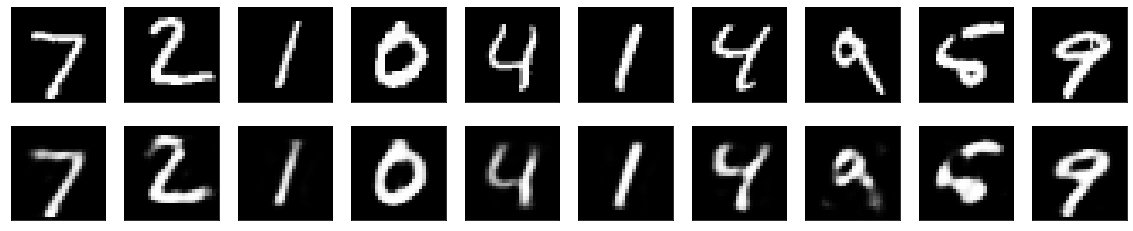

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Sparse AutoEncoder

In [3]:
def Sparse_Encoder(encoding_dim):
  # Encoding Dim : The dimension of the encoded image 
  input_img = tf.keras.Input(shape=(784,))
  encoded = tf.keras.layers.Dense(encoding_dim,activation="relu",activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_img)
  decoded = tf.keras.layers.Dense(784,activation="sigmoid")(encoded)
  model = tf.keras.Model(inputs = input_img, outputs = decoded)
  model.build(input_shape=(784))
  return model

model = Sparse_Encoder(32)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy')
model.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.3994 - val_loss: 0.1970
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1872 - val_loss: 0.1603
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1563 - val_loss: 0.1423
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1405 - val_

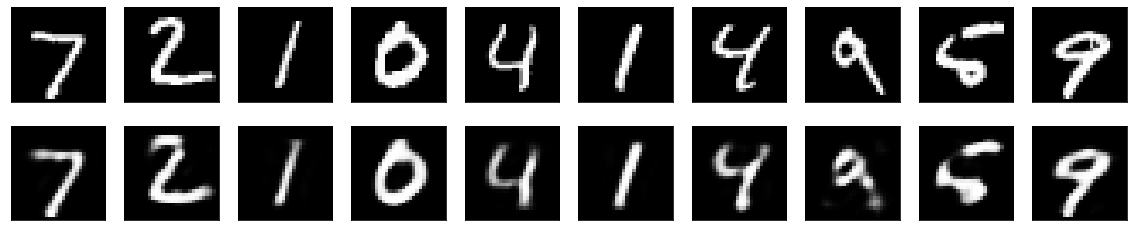

In [5]:
import matplotlib.pyplot as plt


test_imgs = model.predict(x_test)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Deep AutoEncoders

In [7]:
def Deep_AutoEncoder():
  input_img = tf.keras.Input(shape=(784,))
  # Encoding Layers
  encoded = tf.keras.layers.Dense(128,activation="relu")(input_img)
  encoded = tf.keras.layers.Dense(64,activation="relu")(encoded)
  encoded = tf.keras.layers.Dense(32,activation="relu")(encoded)
  
  # Decoding Layers
  decoded = tf.keras.layers.Dense(64,activation="relu")(encoded)
  decoded = tf.keras.layers.Dense(128,activation="relu")(decoded)
  decoded = tf.keras.layers.Dense(784,activation="sigmoid")(decoded)
  
  
  model = tf.keras.Model(inputs = input_img, outputs = decoded)
  model.build(input_shape=(784))
  return model

model = Deep_AutoEncoder()
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy')
model.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 784)               1011

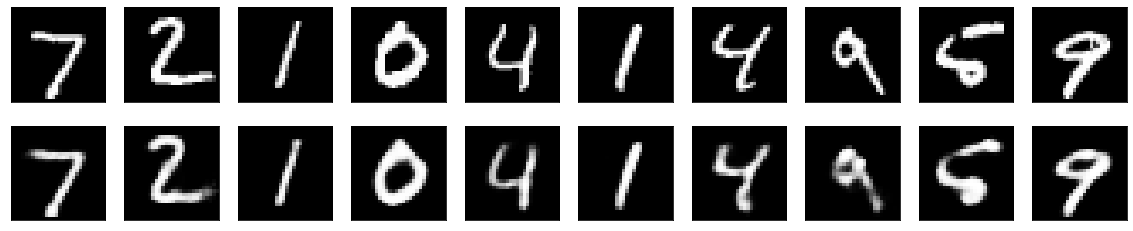

In [8]:
import matplotlib.pyplot as plt


test_imgs = model.predict(x_test)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional AutoEncoder 

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,_),(x_test,_) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train.shape,x_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [3]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
def ConvolutionalEncoder():
  # Part-1 Encoder Part : It will create a encoded representation for the images
  input_img = tf.keras.Input(shape=(28,28,1))
  x = tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same")(input_img)
  x = tf.keras.layers.MaxPooling2D((2,2),padding="same")(x)
  x = tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation="relu",padding="same")(x)
  encoded = tf.keras.layers.MaxPooling2D((2,2),padding="same")(x)
  
  # Part-2 Decoder Part : It will decode the encoded representation of the images
  x = tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation="relu",padding="same")(encoded)
  x = tf.keras.layers.UpSampling2D((2,2))(x)
  x = tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation="relu",padding="same")(x)
  x = tf.keras.layers.UpSampling2D((2,2))(x)
  decoded = tf.keras.layers.Conv2D(1,(3,3),activation="sigmoid",padding="same")(x)

  model = tf.keras.Model(inputs = input_img, outputs = decoded)
  model.build(input_shape=(28,28,1))
  return model

In [5]:
model = ConvolutionalEncoder()
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy')
model.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0     

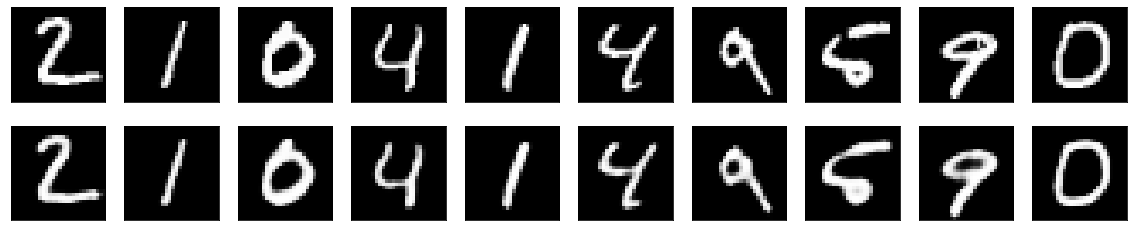

In [6]:
decoded_imgs = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Image Denoising using Convolutional AutoEncoders

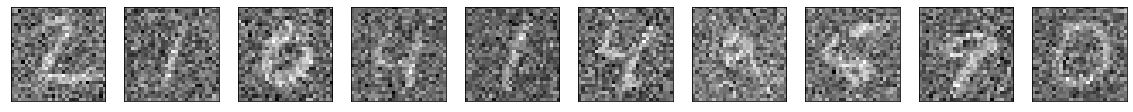

In [8]:
(x_train,_),(x_test,_) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
model = ConvolutionalEncoder()
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy')
model.fit(x_train_noisy, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test_noisy, x_test))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 8)         0   

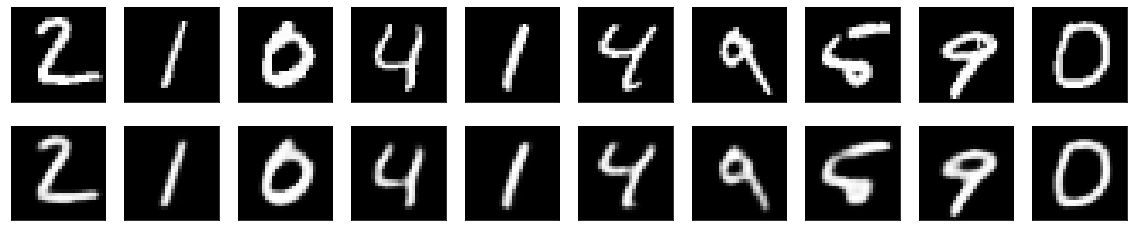

In [10]:
decoded_imgs = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()